In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import pymc3 as pm
import arviz as az

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
data = np.array([1,0,0,1,0,0,1,0,0,0])

In [3]:
data

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [4]:
with pm.Model() as our_first_model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed=data)
#     step = pm.Metropolis()
    trace = pm.sample(1000, random_seed=123)
# https://docs.pymc.io/en/v3/api/inference.html
# 기본적으로 각 chain 별로 1000개가 추출됨 (이는 사용되지는 않음)

C:\Users\yong\AppData\Local\Temp\ipykernel_28588\1156929807.py:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, random_seed=123)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.
C:\Users\yong\anaconda3\envs\textmining_cpu\lib\site-packages\arviz\utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


In [5]:
list(trace)

[{'theta_logodds__': -0.11526368187878937, 'theta': 0.4712159405468309},
 {'theta_logodds__': -1.5513029364442463, 'theta': 0.17489816332262098},
 {'theta_logodds__': -0.030408833005790645, 'theta': 0.4923983775060636},
 {'theta_logodds__': -0.4950926451739799, 'theta': 0.37869460654407044},
 {'theta_logodds__': -1.1390479882133933, 'theta': 0.24249519438208028},
 {'theta_logodds__': -0.5810260728731665, 'theta': 0.35869652850060685},
 {'theta_logodds__': -0.5810260728731665, 'theta': 0.35869652850060685},
 {'theta_logodds__': -0.5274672823957182, 'theta': 0.3711077976731484},
 {'theta_logodds__': -0.5274672823957182, 'theta': 0.3711077976731484},
 {'theta_logodds__': -0.6672311595000849, 'theta': 0.3391171074788873},
 {'theta_logodds__': -0.6672311595000849, 'theta': 0.3391171074788873},
 {'theta_logodds__': -0.6672311595000849, 'theta': 0.3391171074788873},
 {'theta_logodds__': -0.6672311595000849, 'theta': 0.3391171074788873},
 {'theta_logodds__': 0.1646548971799235, 'theta': 0.5410

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\yong\anaconda3\envs\textmining_cpu\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\yong\anaconda3\envs\textmining_cpu\lib\site-packages\arviz\utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(

array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

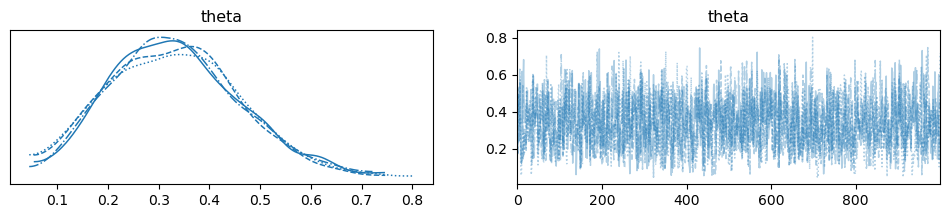

In [6]:
az.plot_trace(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\yong\anaconda3\envs\textmining_cpu\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<Axes: title={'center': 'theta'}>

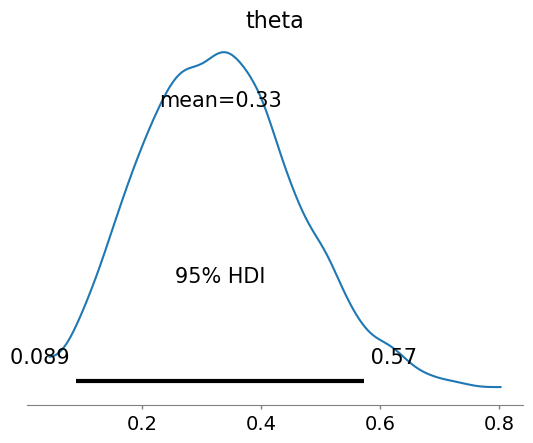

In [7]:
az.plot_posterior(trace, hdi_prob=0.95)

In [8]:
az.summary(trace, kind="stats")

Got error No model on context stack. trying to find log_likelihood in translation.


,mean,sd,hdi_3%,hdi_97%
theta,0.332,0.128,0.089,0.556


In [9]:
with pm.Model() as our_first_model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed=data)
    step = pm.Metropolis() # 메트로폴리스 방법 사용
    trace_MP = pm.sample(1000, step, random_seed=123)

C:\Users\yong\AppData\Local\Temp\ipykernel_28588\1217794175.py:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_MP = pm.sample(1000, step, random_seed=123)
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\yong\anaconda3\envs\textmining_cpu\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

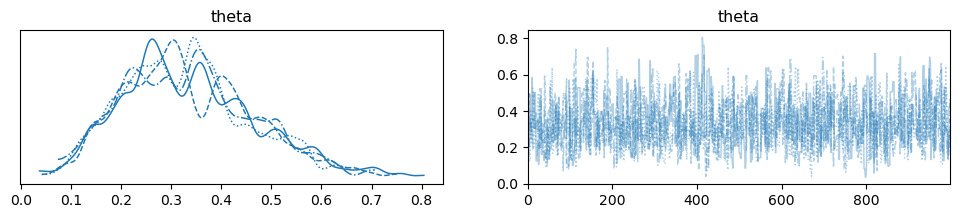

In [10]:
az.plot_trace(trace_MP)

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\yong\anaconda3\envs\textmining_cpu\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<Axes: title={'center': 'theta'}>

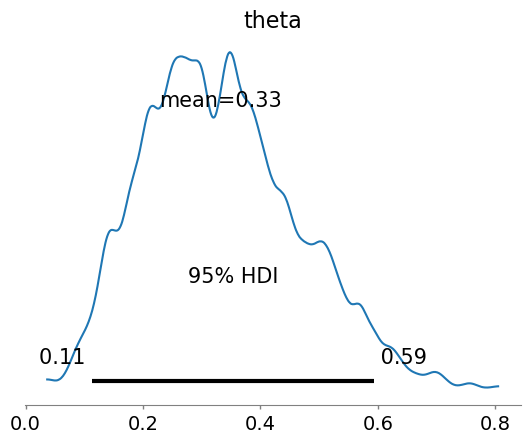

In [11]:
az.plot_posterior(trace_MP, hdi_prob=0.95)

In [12]:
with pm.Model() as our_first_model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed=data)
    step = pm.HamiltonianMC()
    trace_HMC = pm.sample(1000, step, random_seed=123)

C:\Users\yong\AppData\Local\Temp\ipykernel_28588\100180269.py:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_HMC = pm.sample(1000, step, random_seed=123)
Multiprocess sampling (4 chains in 4 jobs)
HamiltonianMC: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\yong\anaconda3\envs\textmining_cpu\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

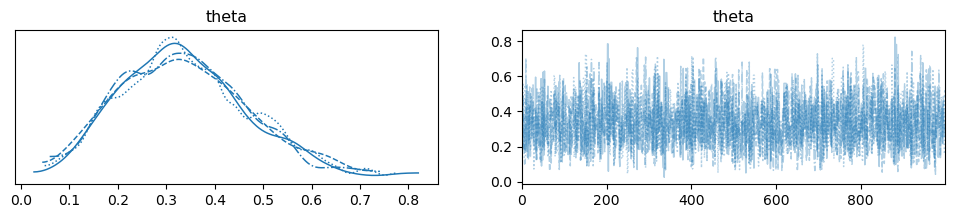

In [13]:
az.plot_trace(trace_HMC)

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\yong\anaconda3\envs\textmining_cpu\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<Axes: title={'center': 'theta'}>

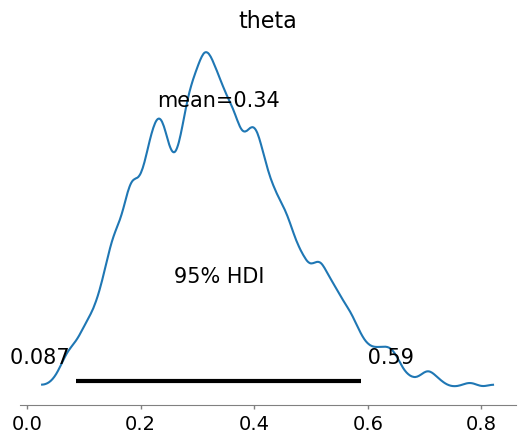

In [14]:
az.plot_posterior(trace_HMC, hdi_prob=0.95)